In [127]:
import pandas as pd
import colorama as col

import matplotlib.pyplot as plt

df = pd.read_csv("./Test Report.csv")

In [128]:
def print_red(s):
    print(col.Fore.RED + s + col.Fore.RESET)

def print_green(s):
    print(col.Fore.GREEN + s + col.Fore.RESET)

In [129]:
def check_tests_status():
    number_of_tests = df.shape[0]
    number_of_tests_passed = df['Status'].value_counts()['Yes']

    if 'No' not in df['Status'].value_counts():
        number_of_tests_failed = 0
    else:
        number_of_tests_failed = df['Status'].value_counts()['No']

    if number_of_tests_passed + number_of_tests_failed != number_of_tests:
        print_red("Error: Number of tests passed and failed does not equal total number of tests")
    else:
        print("Number of tests: ", number_of_tests)
        print_green("Tests passing: " + str(number_of_tests_passed))
        print_red("Tests failing: " + str(number_of_tests_failed))

check_tests_status()


Number of tests:  43
Tests passing: 38
Tests failing: 5


In [130]:
# Priority list of failed tests based on importance level

def list_failed_tests_priority():
    failed_tests = df[df['Status'] == 'No']
    failed_tests = failed_tests.sort_values(by=['Severity'])
    failed_tests = failed_tests.iloc[::-1]
    if failed_tests.empty:
        print_green("No failed tests")
    else:
        for index, row in failed_tests.iterrows():
            print("number: ", row['Bug ID'])
            print("Importance level: ", row['Severity'])
            print("Type of issue: ", row['Bug Description'])
            print("Steps to reproduce: ", row['Steps to reproduce'])
            print("Actual result: ", row['Actual result'])
            print("Expected result: ", row['Expected result'])
            print("How to fix: ", row['How to fix(if known)'])
            print("")

list_failed_tests_priority()

number:  29
Importance level:  3
Type of issue:  Throwing out of the grappler
Steps to reproduce:  1. Start a level with a grappler 2. Take over it 3. Try to throw out of it
Actual result:  You cannot throw out of the grappler
Expected result:  The player should be able to get out of the grappler
How to fix:  Add the already existing script to throw out of the alien

number:  27
Importance level:  3
Type of issue:  Grappling hook not precise
Steps to reproduce:  1. Start a level with a grappler 2. Take over the grappler 3. Use the grappling hook on an aerial surface 4. Try to use it on another aerial surface 5. You can grab the opposite way
Actual result:  The grappling hook can sometimes be not precise and will not attach to the right surface
Expected result:  The grappling hook needs to shoot where the player is aiming
How to fix:  Change the detection system of the grappling hook

number:  47
Importance level:  2
Type of issue:  Grappling through an alien
Steps to reproduce:  1.Star

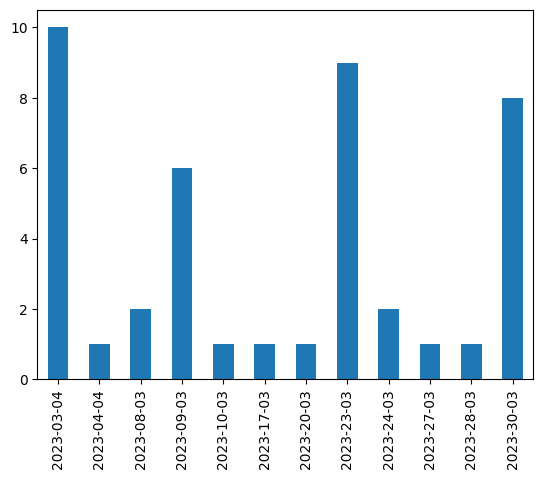

In [131]:
# Graph of all the dates were bugs were discovered

def graph_dates():
    dates = df['Date of discovery'].value_counts()
    dates = dates.sort_index()
    dates.plot(kind='bar')
    plt.show()

graph_dates()

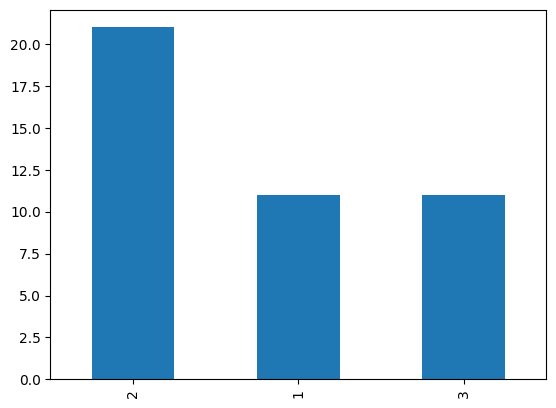

In [132]:
# Graph of all the bugs based on their importance level

def graph_importance():
    importance = df['Severity'].value_counts()
    importance.plot(kind='bar')
    plt.show()

graph_importance()